In [19]:
from astropy.table import Table, Column
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import os
import urllib.request
import astropy.units as u
from astropy.cosmology import z_at_value, FlatLambdaCDM
from astropy import constants as const
from scipy.interpolate import interp1d

In [20]:
os.chdir("/home/benardorci/SimulationData")
os.getcwd()

'/home/benardorci/SimulationData'

In [21]:
Halos = np.load("/home/benardorci/SimulationData/halos.npy")
DMP = np.load("/home/benardorci/SimulationData/dm_cat_ds_10000.npy")
CheckingEverythingIsAlright = 117

In [22]:
# MassBins, where:  

MassBin1 = []    #         MB >= 1e15
MassBin2 = []    # 5e14 <= MB <1e15
MassBin3 = []    # 1e14 <= MB <5e14
MassBin4 = []    # 5e13 <= MB <1e14
MassBin5 = []    # 1e13 <= MB <5e13
MassBin6 = []    #         MB < 1e13

for m, x, y, z, Vx, Vy, Vz in zip(Halos[:,0], Halos[:,1], Halos[:,2], Halos[:,3], Halos[:,4], Halos[:,5], Halos[:,6]) :
    if m >= 1.0*10**15 :
        MassBin1.append([m, x, y, z, Vx, Vy, Vz])
    elif m >= 5.0*10**14 :
        MassBin2.append([m, x, y, z, Vx, Vy, Vz])
    elif m >= 1.0*10**14 :
        MassBin3.append([m, x, y, z, Vx, Vy, Vz])
    elif m >= 5.0*10**13 :
        MassBin4.append([m, x, y, z, Vx, Vy, Vz])
    elif m >= 1.0*10**13 :
        MassBin5.append([m, x, y, z, Vx, Vy, Vz])
    else :
        MassBin6.append([m, x, y, z, Vx, Vy, Vz])

MassBin1 = np.array(MassBin1)
MassBin2 = np.array(MassBin2)
MassBin3 = np.array(MassBin3)
MassBin4 = np.array(MassBin4)
MassBin5 = np.array(MassBin5)
MassBin6 = np.array(MassBin6)

In [23]:
Radius = 10
HalfHeight = 525

NewDMPBoxShell = []

for m, x, y, z, Vx, Vy, Vz in zip(DMP[:,0], DMP[:,1], DMP[:,2], DMP[:,3], DMP[:,4], DMP[:,5], DMP[:,6]) :
    if  x < Radius :
        if y < Radius :
            if z < HalfHeight :
                NewDMPBoxShell.append([m, x+1050+Radius, y+1050+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            elif z > 1050-HalfHeight :
                NewDMPBoxShell.append([m, x+1050+Radius, y+1050+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            else :    
                NewDMPBoxShell.append([m, x+1050+Radius, y+1050+Radius, z+HalfHeight, Vx, Vy, Vz]) #ARISTA
            
        elif y > 1050-Radius :
            if z < HalfHeight :
                NewDMPBoxShell.append([m, x+1050+Radius, y-1050+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            elif z > 1050-HalfHeight :
                NewDMPBoxShell.append([m, x+1050+Radius, y-1050+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            else :    
                NewDMPBoxShell.append([m, x+1050+Radius, y-1050+Radius, z+HalfHeight, Vx, Vy, Vz]) #ARISTA
                
        elif z < HalfHeight :
            NewDMPBoxShell.append([m, x+1050+Radius, y+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #ARISTA
        elif z > 1050-HalfHeight :
            NewDMPBoxShell.append([m, x+1050+Radius, y+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #ARISTA  
            
        else :
            NewDMPBoxShell.append([m, x+1050+Radius, y+Radius, z+HalfHeight, Vx, Vy, Vz]) #CARA
            
    elif  x > 1050-Radius :
        if y < Radius :
            if z < HalfHeight :
                NewDMPBoxShell.append([m, x-1050+Radius, y+1050+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            elif z > 1050-HalfHeight :
                NewDMPBoxShell.append([m, x-1050+Radius, y+1050+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            else :    
                NewDMPBoxShell.append([m, x-1050+Radius, y+1050+Radius, z+HalfHeight, Vx, Vy, Vz]) #ARISTA
            
        elif y > 1050-Radius :
            if z < HalfHeight :
                NewDMPBoxShell.append([m, x-1050+Radius, y-1050+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            elif z > 1050-HalfHeight :
                NewDMPBoxShell.append([m, x-1050+Radius, y-1050+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            else :    
                NewDMPBoxShell.append([m, x-1050+Radius, y-1050+Radius, z+HalfHeight, Vx, Vy, Vz]) #ARISTA
                
        elif z < HalfHeight :
            NewDMPBoxShell.append([m, x-1050+Radius, y+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #ARISTA
        elif z > 1050-HalfHeight :
            NewDMPBoxShell.append([m, x-1050+Radius, y+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #ARISTA
            
        else :
            NewDMPBoxShell.append([m, x-1050+Radius, y+Radius, z+HalfHeight, Vx, Vy, Vz]) #CARA
        
    elif y < Radius :
        if z < HalfHeight :
            NewDMPBoxShell.append([m, x+Radius, y+1050+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #ARISTA
        elif z > 1050-HalfHeight :
            NewDMPBoxShell.append([m, x+Radius, y+1050+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #ARISTA
        else :
            NewDMPBoxShell.append([m, x+Radius, y+1050+Radius, z+HalfHeight, Vx, Vy, Vz]) #CARA
        
    elif y > 1050-Radius :
        if z < HalfHeight :
            NewDMPBoxShell.append([m, x+Radius, y-1050+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #ARISTA
        elif z > 1050-HalfHeight :
            NewDMPBoxShell.append([m, x+Radius, y-1050+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #ARISTA
        else :
            NewDMPBoxShell.append([m, x+Radius, y-1050+Radius, z+HalfHeight, Vx, Vy, Vz]) #CARA
        
    elif z < HalfHeight :
        NewDMPBoxShell.append([m, x+Radius, y+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #CARA             
                  
    elif z > 1050-HalfHeight :
        NewDMPBoxShell.append([m, x+Radius, y+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #CARA

    else :
        continue

DMP[:,1] = DMP[:,1] + Radius 
DMP[:,2] = DMP[:,2] + Radius 
DMP[:,3] = DMP[:,3] + HalfHeight

In [24]:
print(CheckingEverythingIsAlright)

117


In [25]:
NewDMPBox = np.concatenate((DMP, NewDMPBoxShell))

In [26]:
print(CheckingEverythingIsAlright)

117


In [27]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

DistanceOfRS0dot3=cosmo.comoving_distance(0.3)
DistanceOfRS0dot3 = DistanceOfRS0dot3.value

# -------------------------------------- INTERPOLATION --------------------------------------

MPCMin = z_at_value(cosmo.comoving_distance, 0.001*u.Mpc)
MPCMax = z_at_value(cosmo.comoving_distance, 1800*u.Mpc) # ~1200 + 525 = 1725 < 1800 MPC
RSgrid = np.linspace(MPCMin, MPCMax, 50000)
MPCgrid = cosmo.comoving_distance(RSgrid)

MPCtoRSInterpolation = interp1d(MPCgrid, RSgrid)   

# -------------------------------------- INTERPOLATION --------------------------------------

TemporaryFrameOfReference = np.zeros((np.size(NewDMPBox[:,3]),3))

In [28]:
print(CheckingEverythingIsAlright)

117


In [29]:
ID = 0

UpperMPCDistanceLimit = DistanceOfRS0dot3 + 525 # In this case, the size of the DMP box is 1050 MPC, so we are
LowerMPCDistanceLimit = DistanceOfRS0dot3 - 525 # taking half of that upwards and downwards form the halo of 
DMPBoxRSandA = []

for QQ in MassBin1[:,0] :

    # New frame of reference (The Halo that was selected).

    TemporaryFrameOfReference[:,0] = NewDMPBox[:,1] - (MassBin1[ID,1] + Radius)
    TemporaryFrameOfReference[:,1] = NewDMPBox[:,2] - (MassBin1[ID,2] + Radius)
    TemporaryFrameOfReference[:,2] = NewDMPBox[:,3] - (MassBin1[ID,3] + HalfHeight) + DistanceOfRS0dot3

    # Redshift of the DMP.
    # Angles of the DMP.
    
    for m, x, y, z, Vz in zip(NewDMPBox[:,0], TemporaryFrameOfReference[:,0], TemporaryFrameOfReference[:,1],
                              TemporaryFrameOfReference[:,2], NewDMPBox[:,6]) :
        if (LowerMPCDistanceLimit <= z <= UpperMPCDistanceLimit) :
    
            DMPBoxRSandA.append([m, MPCtoRSInterpolation(z) + (Vz/const.c.value)*(1/(1+MPCtoRSInterpolation(z))),
                                 np.arctan(np.sqrt(x**2 + y**2)/z)])
    
    ID = ID + 1

DMPBoxRSandA = np.array(DMPBoxRSandA)

In [30]:
print(CheckingEverythingIsAlright)

117


In [31]:
Cone = []
AngleAt0dot3RS = np.radians(0.3)

for m, RS, A in zip(DMPBoxRSandA[:,0], DMPBoxRSandA[:,1], DMPBoxRSandA[:,2]) :
    if (A <= AngleAt0dot3RS) :
        Cone.append([m, RS, A])

Cone = np.array(Cone)

In [77]:
np.size(Cone)

47040

In [78]:
#np.savetxt("/home/benardorci/SimulationData/MassBin#HistogramsDS1000Height###.txt",FinalVelocities,fmt='%s')

In [79]:
print(CheckingEverythingIsAlright)

117


In [80]:
print(CheckingEverythingIsAlright)

117


In [81]:
#plt.hist(FinalVelocities, bins=100, histtype='bar', stacked=True)
#plt.savefig("/Users/Roberto Benard Orci/Documents/UNI/Verano Investigacion/Simulation data/Many Histograms/MassBin#HistogramsDS1000.png")

In [82]:
print(CheckingEverythingIsAlright)

117


In [84]:
#np.save("/home/benardorci/SimulationData/MassBin#HistogramsDS1000Height###.npy",FinalVelocities)
np.save("/calvin1/benardorci/VelocityHistogramsFromRedshift/DS10000-MassBin1-Angle0dot3-Redshift.npy",Cone)

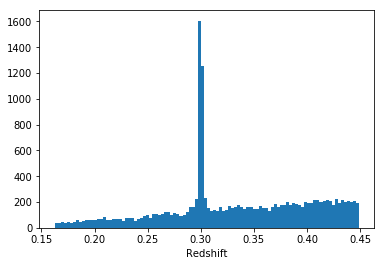

<Figure size 432x288 with 0 Axes>

In [85]:
plt.hist(Cone[:,1], bins=100) #density=True
plt.xlabel("Redshift")
plt.show()
#plt.savefig("/home/benardorci/SimulationData/MassBin#HistogramsDS1000Height###.png")
plt.savefig("/calvin1/benardorci/VelocityHistogramsFromRedshift/DS10000-MassBin1-Angle0dot3-Redshift.png")

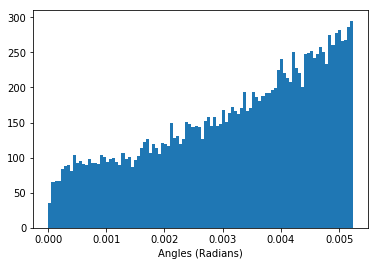

In [86]:
plt.hist(Cone[:,2], bins=100) #density=True
plt.xlabel("Angles (Radians)")
plt.show()

In [87]:
FinalVelocitys = const.c.value*(Cone[:,1]-0.3)/(1.3*1000) # the 1000 is used to normalize.
V = []

for Vz, m in zip(FinalVelocitys, Cone[:,0]) :
    if (-3000 <= Vz <= 3000) :
        V.append([m,Vz])
        
V = np.array(V)

np.save("/calvin1/benardorci/VelocityHistogramsFromRedshift/DS10000-MassBin1-Angle0dot3-Velocity.npy",Cone)

In [88]:
print(np.size(V))
print(V[:,0].max())
print(MassBin1[:,0].min())
print(NewDMPBox[:,0].max())

8138
2743852163.0
1001300000000000.0
2743988554.0


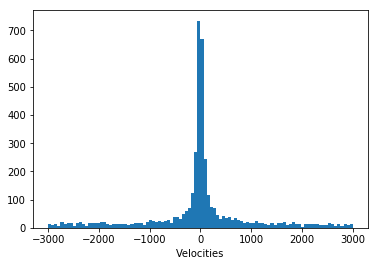

<Figure size 432x288 with 0 Axes>

In [89]:
plt.hist(V[:,1], bins=100)
plt.xlabel("Velocities")
plt.show()
plt.savefig("/calvin1/benardorci/VelocityHistogramsFromRedshift/DS10000-MassBin1-Angle0dot3-Velocity.png")

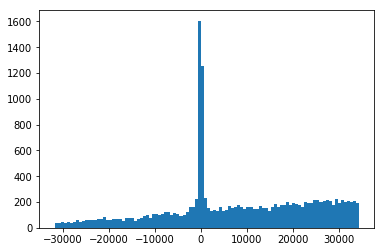

In [90]:
plt.hist(FinalVelocitys, bins=100)
plt.show()

In [91]:
cosmo.angular_diameter_distance(0.3)

<Quantity 918.76682286 Mpc>

In [92]:
print(np.size(MassBin1[:,0]))
print(np.size(MassBin2[:,0]))
print(np.size(MassBin3[:,0]))
print(np.size(MassBin4[:,0]))
print(np.size(MassBin5[:,0]))
print(np.size(MassBin6[:,0]))

398
2372
54805
93087
744615
287196
